## 12. Лабораторная работа «Решение задач глубокого обучения» 

Dataset: [banknote authentication](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow import keras
from tensorflow.keras import layers
import os
import requests

%matplotlib inline
pd.options.display.max_columns = None

In [3]:
header = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]  
data = pd.read_csv("data_banknote_authentication.txt", names=header)
data = data.astype({"Class": "category"})
data.sample(5)

,Variance,Skewness,Curtosis,Entropy,Class
969,-2.17860,-6.4479,6.0344,-0.20777,1
1217,0.61652,3.8944,-4.7275,-4.39480,1
390,-0.36279,8.2895,-1.9213,-3.33320,0
182,-0.69572,8.6165,1.8419,-4.32890,0
679,0.77805,6.6424,-1.1425,-1.05730,0


In [4]:
display(data.describe())

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [6]:
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

X = data.drop(columns=["Class"]).copy()
X_norm = pd.DataFrame(normalize(X), columns=header[:-1])
y = data["Class"].copy()

X_norm.sample(5)

,Variance,Skewness,Curtosis,Entropy
1194,0.159460,0.273982,0.547964,0.774107
1242,0.080689,0.113563,0.900283,0.412412
443,0.653796,0.404731,0.400031,0.498717
250,0.710903,0.121415,0.533887,0.441407
1017,0.292836,0.115993,0.637013,0.703567


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=1337)

In [9]:
model = keras.Sequential([
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train.to_numpy(), y_train.to_numpy(), batch_size=16, epochs=100)

Epoch 1/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5077
Epoch 2/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5497
Epoch 3/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5497
Epoch 4/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.5515
Epoch 5/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.5971
Epoch 6/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6864
Epoch 7/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.7138
Epoch 8/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.7329
Epoch 9/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.7402
Epoch 10/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.7584
Epoch 11/

69/69 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8961
Epoch 84/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.8952
Epoch 85/100
69/69 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8952
Epoch 86/100
69/69 [==============================] - 0s 1ms/step - loss: 0.2976 - accuracy: 0.8970
Epoch 87/100
69/69 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8979
Epoch 88/100
69/69 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.8970
Epoch 89/100
69/69 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.8961
Epoch 90/100
69/69 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.8979
Epoch 91/100
69/69 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.8979
Epoch 92/100
69/69 [==============================] - 0s 1ms/step - loss: 0.2902 - accuracy: 0.8961
Epoch 93/100


In [10]:
def calc_plot_roc(model, X_test, y_test):
    y_pred = model.predict(X_test).flatten()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f"%auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

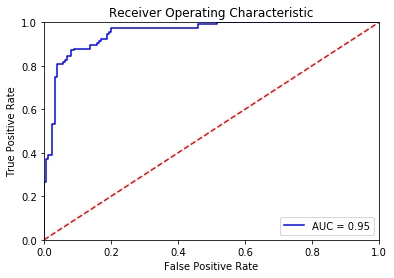

In [11]:
calc_plot_roc(model, X_test, y_test)